# Statistical analysis using `pandas`

- [Python Data science handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html)
- [10 Minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)


**Table of Content:**

1. [Introduction](#intro)
2. [Series](#series)
3. [Dataframes](#dataframes)
4. [Plotting](#plotting)
5. [Reading, writing **excel**, csv, and hdf5](#io)
6. [Basic statistical analysis](#statistics)

<a id='intro'></a>
# Introduction

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook).


### **Import `pandas`**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='series'></a>
# Pandas Series

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [3]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [4]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
data[1]

0.5

In [6]:
data[1:3]

1    0.50
2    0.75
dtype: float64

### **Dealing with `nan`**

In [7]:
data_np = np.array([1, 3, 5, np.nan, 6, 8])
data = pd.Series(data_np)
data

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### **max, min, mean**

In [8]:
#no problem
data.max(), data.min(), data.mean()

(8.0, 1.0, 4.6)

In [9]:
# A bit complicated
data_np.max(), data_np.min(), data_np.mean()

(nan, nan, nan)

In [10]:
# But not impossible
np.nanmax(data_np), np.nanmin(data_np), np.nanmean(data_np)

(8.0, 1.0, 4.6)

### **labelled series**

In [11]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [12]:
data['b']

0.5

In [13]:
data.iloc[1]

0.5

In [14]:
data.iloc[1:3]

b    0.50
c    0.75
dtype: float64

### **Dictionary index**

In [15]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

<a id='dataframes'></a>
# DataFrames

In [16]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [17]:
df = pd.DataFrame({'sin': sin_t, 'cos': cos_t},index=t)  
df.head()

,sin,cos
-6.000000,0.279415,0.960170
-5.368421,0.792419,0.609977
-4.736842,0.999701,0.024451
-4.105263,0.821291,-0.570509
-3.473684,0.326021,-0.945363


In [18]:
df.to_numpy()

array([[ 0.2794155 ,  0.96017029],
       [ 0.79241881,  0.6099774 ],
       [ 0.99970104,  0.02445069],
       [ 0.82129115, -0.57050928],
       [ 0.32602102, -0.94536252],
       [-0.29503045, -0.95548785],
       [-0.80225698, -0.59697884],
       [-0.99996678, -0.00815095],
       [-0.81188195,  0.58382164],
       [-0.310567  ,  0.95055149],
       [ 0.310567  ,  0.95055149],
       [ 0.81188195,  0.58382164],
       [ 0.99996678, -0.00815095],
       [ 0.80225698, -0.59697884],
       [ 0.29503045, -0.95548785],
       [-0.32602102, -0.94536252],
       [-0.82129115, -0.57050928],
       [-0.99970104,  0.02445069],
       [-0.79241881,  0.6099774 ],
       [-0.2794155 ,  0.96017029]])

In [19]:
df.dtypes

sin    float64
cos    float64
dtype: object

In [20]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [21]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

<a id='plotting'></a>
# Plotting

plotting is super-easy

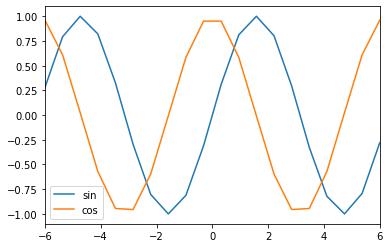

In [22]:
df.plot()

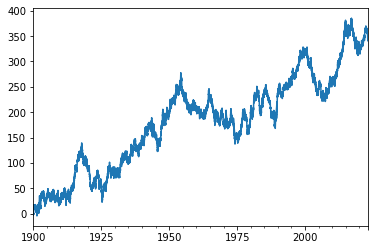

In [23]:
ts = pd.Series(np.random.randn(45000),
               index=pd.date_range('1/1/1900', periods=45000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

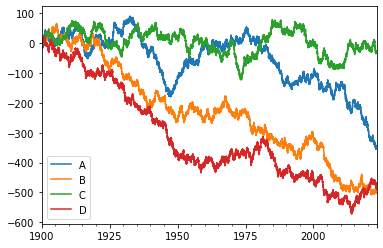

In [24]:
df = pd.DataFrame(np.random.randn(45000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

plt.figure()
df.plot()
plt.legend(loc='best')

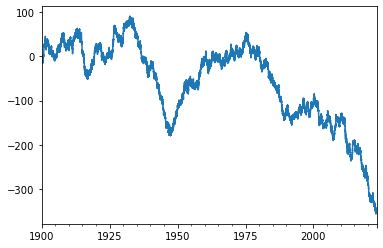

In [25]:
df['A'].plot()

In [26]:
df.describe()

,A,B,C,D
count,45000.000000,45000.000000,45000.000000,45000.000000
mean,-58.612850,-226.988164,3.214128,-313.361073
std,91.822689,155.822916,40.212850,162.296298
min,-355.928156,-509.128080,-122.654053,-572.380638
25%,-128.998996,-336.737556,-20.737855,-437.785377
50%,-26.659032,-231.407431,6.508351,-372.697840
75%,10.543447,-111.334958,33.871246,-177.654215
max,90.370865,66.346537,79.357691,24.809176


<a id='io'></a>

# **File I/O**

- reading `csv`
- reading `excel`
- reading `hdf5`

### **csv** (fast, simple)

In [27]:
df.index.name = 'time'
df.to_csv('foo.csv')

In [28]:
!head foo.csv

time,A,B,C,D
1900-01-01,-1.1190652434145012,-0.8170260608211657,0.6896412881609868,0.007396558262463458
1900-01-02,-1.6654255310812793,-2.5564780908235623,0.8426492151506279,0.5846468374183935
1900-01-03,-1.711251251813269,-3.0108175817376357,1.8700588286988142,0.703069778502929
1900-01-04,-3.509780829152314,-3.160235785270834,2.967196507245297,1.9261438412635823
1900-01-05,-4.501883066644041,-3.571093314048569,4.061838027508743,2.0715778268645084
1900-01-06,-3.728904735033837,-4.2595186308557125,4.678906407421984,3.552845298071466
1900-01-07,-2.5172141650767736,-4.920684125219758,4.043916014062499,1.959364112160967
1900-01-08,-2.2145059329950443,-2.9993851482961125,3.675626611019119,2.5106106841781974
1900-01-09,-0.16421252367596972,-2.2517598726023165,5.412327160720512,3.405195372202757


In [29]:
df2 = pd.read_csv('foo.csv', index_col=0)
df2.head()

,A,B,C,D
time,,,,
1900-01-01,-1.119065,-0.817026,0.689641,0.007397
1900-01-02,-1.665426,-2.556478,0.842649,0.584647
1900-01-03,-1.711251,-3.010818,1.870059,0.703070
1900-01-04,-3.509781,-3.160236,2.967197,1.926144
1900-01-05,-4.501883,-3.571093,4.061838,2.071578


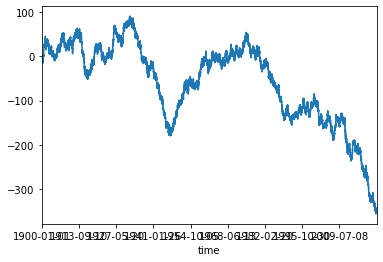

In [30]:
df2['A'].plot()

### **excel** (slow)

In [31]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [32]:
df2 = pd.read_excel('foo.xlsx', 'Sheet1', index_col=0, na_values=['NA'])
df2.head()

,A,B,C,D
time,,,,
1900-01-01,-1.119065,-0.817026,0.689641,0.007397
1900-01-02,-1.665426,-2.556478,0.842649,0.584647
1900-01-03,-1.711251,-3.010818,1.870059,0.703070
1900-01-04,-3.509781,-3.160236,2.967197,1.926144
1900-01-05,-4.501883,-3.571093,4.061838,2.071578


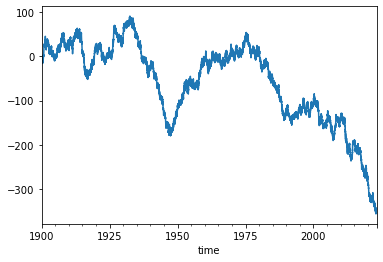

In [33]:
df2['A'].plot()

### **hdf5** (efficient, compressed)

In [34]:
df.to_hdf('foo.h5', 'df')

In [35]:
df2 = pd.read_hdf('foo.h5', 'df')
df2.head()

,A,B,C,D
time,,,,
1900-01-01,-1.119065,-0.817026,0.689641,0.007397
1900-01-02,-1.665426,-2.556478,0.842649,0.584647
1900-01-03,-1.711251,-3.010818,1.870059,0.703070
1900-01-04,-3.509781,-3.160236,2.967197,1.926144
1900-01-05,-4.501883,-3.571093,4.061838,2.071578


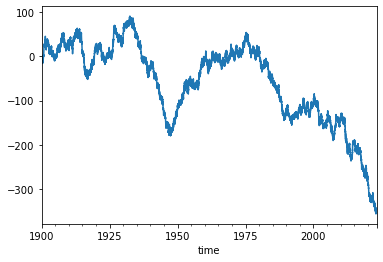

In [36]:
df2['A'].plot()

### **File size**

In [37]:
!ls -lh foo* | sort

-rw-r--r-- 1 lento lento 1.8M Jul 16 19:29 foo.h5
-rw-r--r-- 1 lento lento 2.7M Jul 16 19:29 foo.xlsx
-rw-r--r-- 1 lento lento 3.8M Jul 16 19:29 foo.csv


<a id='statistics'></a>
# Basic statistical analysis

### **Load csv data**

In [38]:
df = pd.read_csv('data/brain_size.csv', sep=';', na_values=".")
df.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [39]:
df.columns  # It has columns   

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [40]:
df['Gender'].head()  # Columns can be addressed by name   

0    Female
1      Male
2      Male
3      Male
4    Female
Name: Gender, dtype: object

### **Plot and inspect**

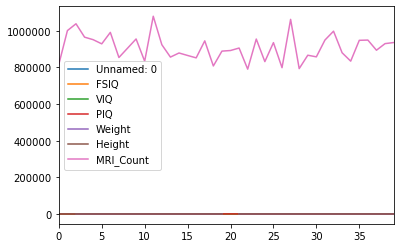

In [41]:
df.plot()

Let's calculate the *mean* `VIQ` for `Female`

In [42]:
df.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [43]:
# Simpler selector
df[df['Gender'] == 'Female']['VIQ'].mean()

109.45

In [44]:
groupby_gender = df.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [45]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: MRI_Count, dtype: object

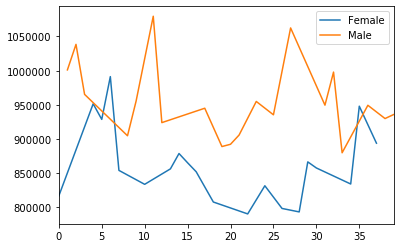

In [46]:
groupby_gender['MRI_Count'].plot(legend='True')

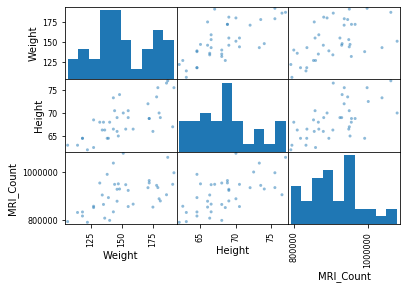

In [47]:
pd.plotting.scatter_matrix(df[['Weight', 'Height', 'MRI_Count']]);

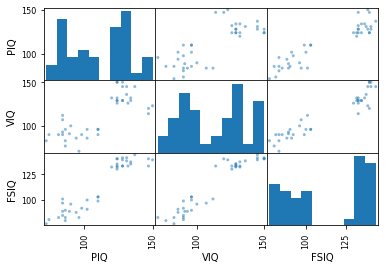

In [48]:
pd.plotting.scatter_matrix(df[['PIQ', 'VIQ', 'FSIQ']]);

# cleanup

In [49]:
!rm foo.csv foo.xlsx foo.h5